In [1]:
# This example demonstrates the compilation of quantum programs using qstack.
# Compilation is the process of transforming a high-level quantum program into a lower-level representation suitable for execution.
# The Toy layer is a simplified abstraction layer for quantum operations, useful for prototyping and testing.
# It uses gates with names that reflect the intention (e.g., Flip) instead of the mathematical operation (e.g., X).
# It provides basic quantum gates and operations to define quantum programs.
import qstack

program = None

# Set up logging to monitor the execution of the program.
import logging

logger = logging.getLogger("qstack")

handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
logger.addHandler(handler)


In [2]:
%%qstack

@stack: cliffords-min

allocate q1:
measure

Program(stack=Stack(target=LayerNode(lower=None, namespace='', layer=Layer(name='cliffords-min', quantum_definitions={QuantumDefinition(name='z', targets_length=1, matrix=[[1, 0], [0, -1]], factory=None), QuantumDefinition(name='x', targets_length=1, matrix=[[0, 1], [1, 0]], factory=None), QuantumDefinition(name='cz', targets_length=2, matrix=[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]], factory=None), QuantumDefinition(name='y', targets_length=1, matrix=[[0, (-0-1j)], [1j, 0]], factory=None), QuantumDefinition(name='h', targets_length=1, matrix=[[0.7071, 0.7071], [0.7071, -0.7071]], factory=None), QuantumDefinition(name='cx', targets_length=2, matrix=[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], factory=None)}, classic_definitions=set()))), kernels=[Kernel(targets=(QubitId(value='q1'),), instructions=(), callback=None)])

In [3]:
# Compile the program using the Steane error-correcting compiler.
from qstack.compilers.steane import SteaneCompiler

compiler = SteaneCompiler()
compiled = compiler.compile(program)

# Print the compiled program to see the error-corrected version.
print(compiled)


2025-05-08 17:39:47,174 - WARNING - Instruction cz has no handler.
2025-05-08 17:39:47,175 - WARNING - Instruction y has no handler.


@stack: cliffords-min.extended@steane@l0:cliffords-min

allocate q1.0 q1.1 q1.2 q1.3 q1.4 q1.5 q1.6:
  ---
  ---
  h q1.4
  h q1.5
  h q1.6
  cx q1.4 q1.0
  cx q1.4 q1.1
  cx q1.4 q1.3
  cx q1.5 q1.0
  cx q1.5 q1.2
  cx q1.5 q1.3
  cx q1.6 q1.1
  cx q1.6 q1.2
  cx q1.6 q1.3
measure
?? decode


In [4]:
# Set up a local quantum machine to execute the compiled program.
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
# Set up a local quantum machine to execute the program.
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
from qstack.machine import local_machine_for

machine = local_machine_for(compiled.stack)

# Perform a single-shot execution of the error-corrected program.
# A single-shot execution runs the program once and returns the measurement outcomes.
# This is useful for observing the result of a single execution of the quantum program.
machine.single_shot(compiled)

logger.setLevel(logging.INFO)


In [5]:
%%qstack
# Define a more complex program to demonstrate error correction in action.
@stack: cliffords-min

allocate q1 q2:
  h q1
  cx q1 q2
measure


Program(stack=Stack(target=LayerNode(lower=None, namespace='', layer=Layer(name='cliffords-min', quantum_definitions={QuantumDefinition(name='z', targets_length=1, matrix=[[1, 0], [0, -1]], factory=None), QuantumDefinition(name='x', targets_length=1, matrix=[[0, 1], [1, 0]], factory=None), QuantumDefinition(name='cz', targets_length=2, matrix=[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]], factory=None), QuantumDefinition(name='y', targets_length=1, matrix=[[0, (-0-1j)], [1j, 0]], factory=None), QuantumDefinition(name='h', targets_length=1, matrix=[[0.7071, 0.7071], [0.7071, -0.7071]], factory=None), QuantumDefinition(name='cx', targets_length=2, matrix=[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], factory=None)}, classic_definitions=set()))), kernels=[Kernel(targets=(QubitId(value='q1'), QubitId(value='q2')), instructions=(QuantumInstruction(name='h', targets=[QubitId(value='q1')], parameters={}), QuantumInstruction(name='cx', targets=[QubitId(value='q1'), Qubit

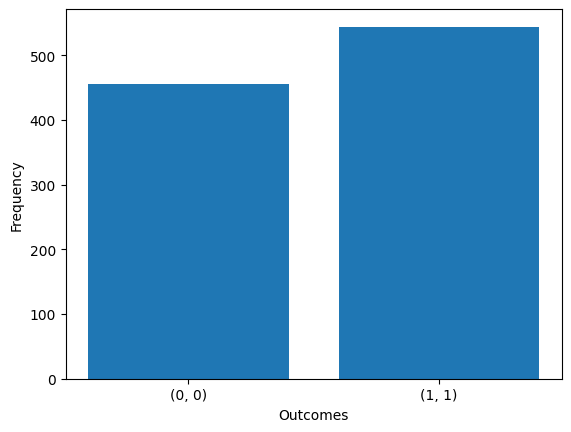

In [6]:
# Execute the original program without error correction and plot the results.
machine = local_machine_for(program.stack)
machine.eval(program).plot_histogram()


In [7]:
# Compile the program with the Steane error-correcting compiler.
compiled = compiler.compile(program)

# Print the compiled program.
print(compiled)


@stack: cliffords-min.extended@steane@l0:cliffords-min

allocate q1.0 q1.1 q1.2 q1.3 q1.4 q1.5 q1.6:
  allocate q2.0 q2.1 q2.2 q2.3 q2.4 q2.5 q2.6:
    ---
    ---
    h q1.4
    h q1.5
    h q1.6
    cx q1.4 q1.0
    cx q1.4 q1.1
    cx q1.4 q1.3
    cx q1.5 q1.0
    cx q1.5 q1.2
    cx q1.5 q1.3
    cx q1.6 q1.1
    cx q1.6 q1.2
    cx q1.6 q1.3
    ---
    h q2.4
    h q2.5
    h q2.6
    cx q2.4 q2.0
    cx q2.4 q2.1
    cx q2.4 q2.3
    cx q2.5 q2.0
    cx q2.5 q2.2
    cx q2.5 q2.3
    cx q2.6 q2.1
    cx q2.6 q2.2
    cx q2.6 q2.3
    allocate q1.z.0 q1.z.1 q1.z.2:
      cx q1.0 q1.z.0
      cx q1.1 q1.z.0
      cx q1.3 q1.z.0
      cx q1.4 q1.z.0
      cx q1.0 q1.z.1
      cx q1.2 q1.z.1
      cx q1.3 q1.z.1
      cx q1.5 q1.z.1
      cx q1.1 q1.z.2
      cx q1.2 q1.z.2
      cx q1.3 q1.z.2
      cx q1.6 q1.z.2
    measure
    ?? correct_z(qubit=q1)
    allocate q1.x.0 q1.x.1 q1.x.2:
      h q1.x.0
      h q1.x.1
      h q1.x.2
      cx q1.x.0 q1.0
      cx q1.x.0 q1.1
      cx

2025-05-08 17:39:47,695 - DEBUG - Found gate y: [[0, (-0-1j)], [1j, 0]]
2025-05-08 17:39:47,698 - DEBUG - Found gate z: [[1, 0], [0, -1]]
2025-05-08 17:39:47,700 - DEBUG - Found gate x: [[0, 1], [1, 0]]
2025-05-08 17:39:47,701 - DEBUG - Found gate h: [[0.7071, 0.7071], [0.7071, -0.7071]]
2025-05-08 17:39:47,702 - DEBUG - Found gate cz: [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]
2025-05-08 17:39:47,703 - DEBUG - Found gate cx: [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]
2025-05-08 17:39:47,704 - DEBUG - restart: 17
2025-05-08 17:39:47,707 - DEBUG - eval: h [12]
2025-05-08 17:39:47,715 - DEBUG - eval: h [11]
2025-05-08 17:39:47,719 - DEBUG - eval: h [10]
2025-05-08 17:39:47,723 - DEBUG - eval: cx [16, 12]
2025-05-08 17:39:47,727 - DEBUG - eval: cx [15, 12]
2025-05-08 17:39:47,732 - DEBUG - eval: cx [13, 12]
2025-05-08 17:39:47,736 - DEBUG - eval: cx [16, 11]
2025-05-08 17:39:47,740 - DEBUG - eval: cx [14, 11]
2025-05-08 17:39:47,746 - DEBUG - eval: cx [13, 11]

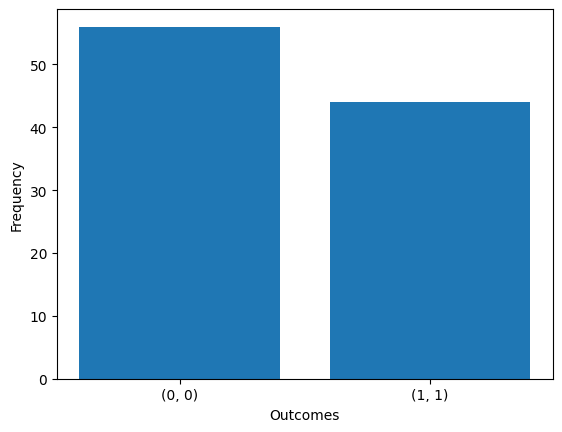

In [8]:
# Execute the error-corrected program and plot the results.
logger.setLevel(logging.DEBUG)

machine = local_machine_for(compiled.stack)
machine.single_shot(compiled)

logger.setLevel(logging.INFO)
machine.eval(compiled, shots=100).plot_histogram()


In [9]:
%%qstack
# Demonstrate the state preparation routine for the Steane code.
@stack: cliffords-min

allocate 0 1 2 3 4 5 6:
  h 4
  h 5
  h 6
  cx 4 0
  cx 4 1
  cx 4 3
  cx 5 0
  cx 5 2
  cx 5 3
  cx 6 1
  cx 6 2
  cx 6 3
measure

Program(stack=Stack(target=LayerNode(lower=None, namespace='', layer=Layer(name='cliffords-min', quantum_definitions={QuantumDefinition(name='z', targets_length=1, matrix=[[1, 0], [0, -1]], factory=None), QuantumDefinition(name='x', targets_length=1, matrix=[[0, 1], [1, 0]], factory=None), QuantumDefinition(name='cz', targets_length=2, matrix=[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]], factory=None), QuantumDefinition(name='y', targets_length=1, matrix=[[0, (-0-1j)], [1j, 0]], factory=None), QuantumDefinition(name='h', targets_length=1, matrix=[[0.7071, 0.7071], [0.7071, -0.7071]], factory=None), QuantumDefinition(name='cx', targets_length=2, matrix=[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], factory=None)}, classic_definitions=set()))), kernels=[Kernel(targets=(QubitId(value='0'), QubitId(value='1'), QubitId(value='2'), QubitId(value='3'), QubitId(value='4'), QubitId(value='5'), QubitId(value='6')), instructions=(QuantumInstruction(name='h', targets=[Qubit

In [10]:
# Execute the state preparation routine and print the resulting histogram.
machine = local_machine_for(program.stack)
for k, v in machine.eval(program).get_histogram().items():
    print(k, v)


(0, 0, 0, 0, 0, 0, 0) 121
(0, 1, 1, 1, 0, 0, 1) 102
(1, 1, 0, 0, 0, 1, 1) 135
(0, 0, 0, 1, 1, 1, 1) 136
(1, 0, 1, 0, 1, 0, 1) 117
(1, 0, 1, 1, 0, 1, 0) 129
(0, 1, 1, 0, 1, 1, 0) 125
(1, 1, 0, 1, 1, 0, 0) 135
